In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [46]:
price = pd.read_csv('Ames_HousePrice.csv')

In [47]:
pd.set_option('display.max_columns', 82)
price.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [48]:
# Removing the outlier on the column 'GrLivArea'
## REMOVE?

#price = price.loc[price["GrLivArea"] != 4676]

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>],
       [<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,


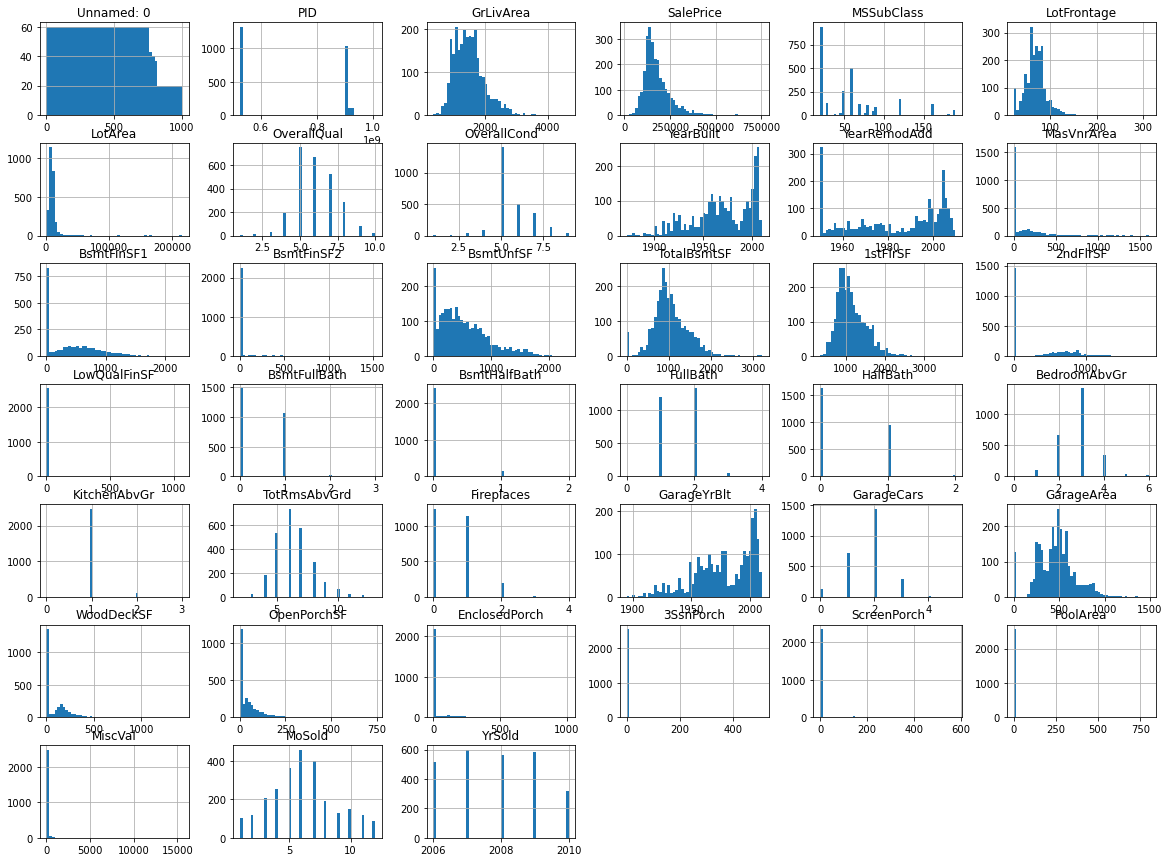

In [49]:
price.hist(bins=50, figsize=(20,15))

Text(0, 0.5, 'Frequency')

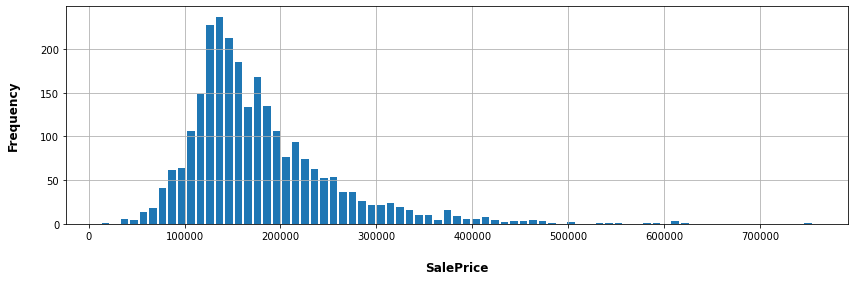

In [50]:
#histogram of sales price, we noticed the right-skewedness

df = price['SalePrice'].hist(bins=75, rwidth=.8, figsize=(14,4))
df.set_xlabel("SalePrice", labelpad=20, weight='bold', size=12)
df.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

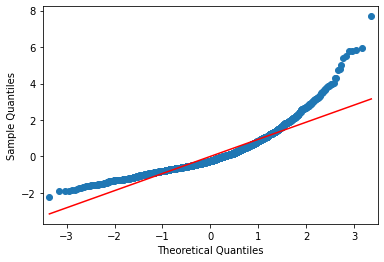

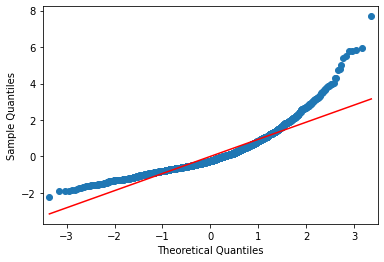

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

a = price['SalePrice']
sm.qqplot(a, line='r', fit = True)


In [110]:
df

<AxesSubplot:xlabel='SalePrice', ylabel='Frequency'>

Text(0, 0.5, 'Frequency')

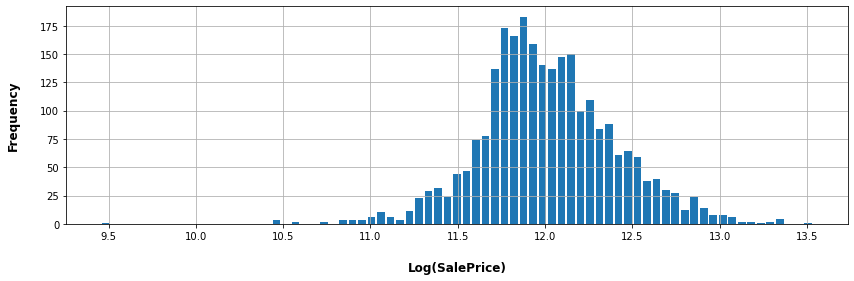

In [51]:
#more normal/Gaussian distribution with log(SalePrice)

df1 = price['SalePrice']
df1 = np.log(df1)
df1 = df1.hist(bins=75, rwidth=.8, figsize=(14,4))
df1.set_xlabel("Log(SalePrice)", labelpad=20, weight='bold', size=12)
df1.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

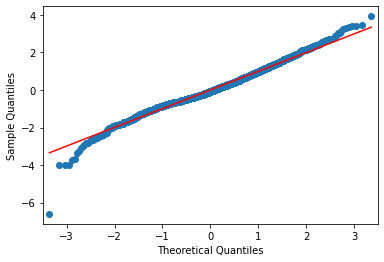

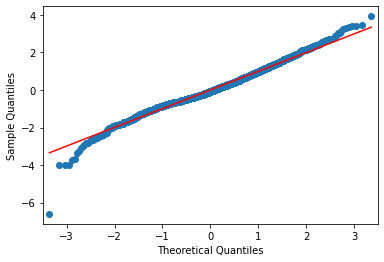

In [121]:
b = price['SalePrice']
b = np.log(b)
sm.qqplot(b, line='r', fit = True)


<AxesSubplot:>

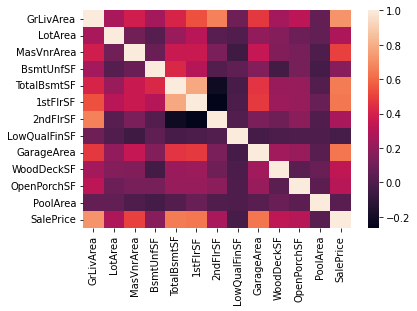

In [52]:
#correlation table of sales price + area variables

size_related = price.filter(regex='SF$|Area$')
size_related = size_related.fillna(0.0)
corr = pd.concat([size_related, price['SalePrice']], axis=1).corr()
sns.heatmap(corr)

In [159]:
#pairwise correlations of saleprice versus independent variables

corr_v_sp = price.corr().SalePrice.sort_values(ascending=False)
s = corr_v_sp
s = s.iloc[np.r_[1:11, 33:38]]

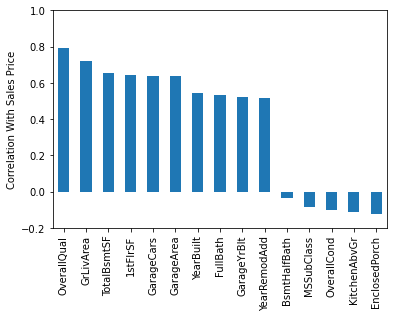

In [161]:

s.plot.bar()
plt.ylabel('Correlation With Sales Price')
plt.ylim(-.2, 1)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

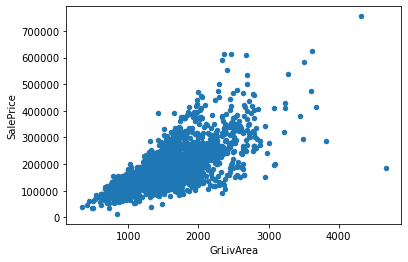

In [162]:
price.plot.scatter(x='GrLivArea', y='SalePrice')

In [66]:
## function to find outliers based on standard deviations

def outlier_find(df,cname,numstd):
    for c in cname:
        grl = df[cname]
        grl = np.array(grl)
    

        mean = np.mean(grl, axis=0)
        sd = np.std(grl, axis=0)

        #final_list = [x for x in grl if (x > mean - 2 * sd)]
        #final_list = [x for x in final_list if (x < mean + 2 * sd)]
        df = df[(df[cname] >= mean+(numstd*sd)) | (df[cname] <= mean-(numstd*sd))]
        print(df)

In [93]:
outlier_find(price,'LotArea',6)


      Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
249          250  906426060       2144     277000          50       RL   
355          356  916176125       2036     375000          20       RL   
1271         272  905301050       1824     302000          20       RL   
1634         635  916125425       1786     228950         190       RL   
1955         139  906475200       1533     280000          20       RL   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
249           NaN   159000   Pave   NaN      IR2         Low    AllPub   
355         150.0   215245   Pave   NaN      IR3         Low    AllPub   
1271          NaN   115149   Pave   NaN      IR2         Low    AllPub   
1634          NaN   164660   Grvl   NaN      IR1         HLS    AllPub   
1955         62.0    70761   Pave   NaN      IR1         Low    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
249    CulDSac       Sev      ClearCr 

/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/stevenmlee/opt/anaconda3/lib

In [ ]:
#overall quality 




In [94]:
pd.set_option("display.max_columns" , None)
price.describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2580.000000,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,436.480233,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,258.829647,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,1.000000,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,215.750000,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,430.500000,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,645.250000,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1000.000000,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

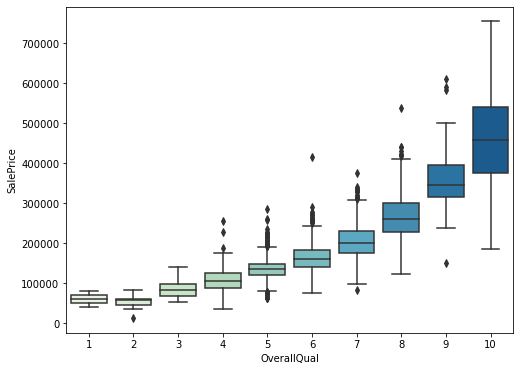

In [95]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=price, palette='GnBu')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

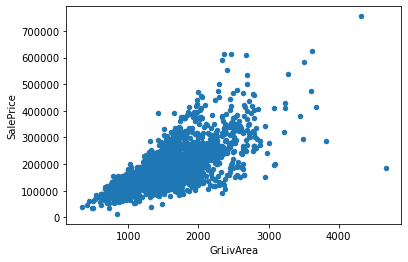

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

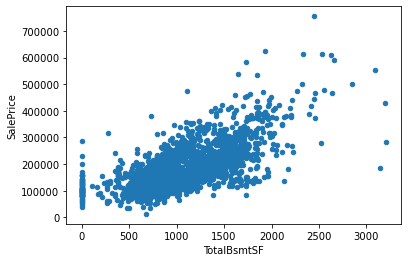

In [97]:
price.plot.scatter(x='TotalBsmtSF', y='SalePrice')

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


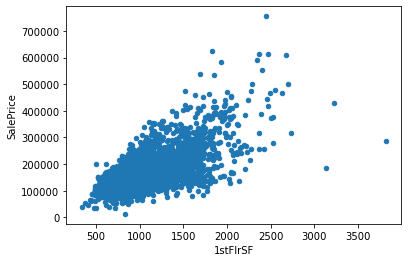

In [98]:
price.plot.scatter(x='1stFlrSF', y='SalePrice')
price.head()

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

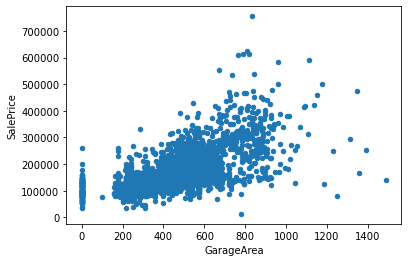

In [99]:
price.plot.scatter(x='GarageArea', y='SalePrice')

<AxesSubplot:>

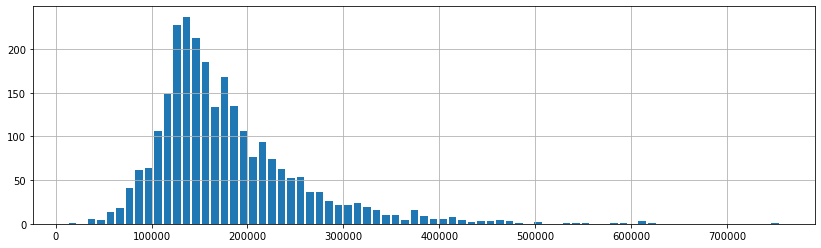

In [100]:
price['SalePrice'].hist(bins=75, rwidth=.8, figsize=(14,4))
#skewed right distribution with outliers (expensive houses)

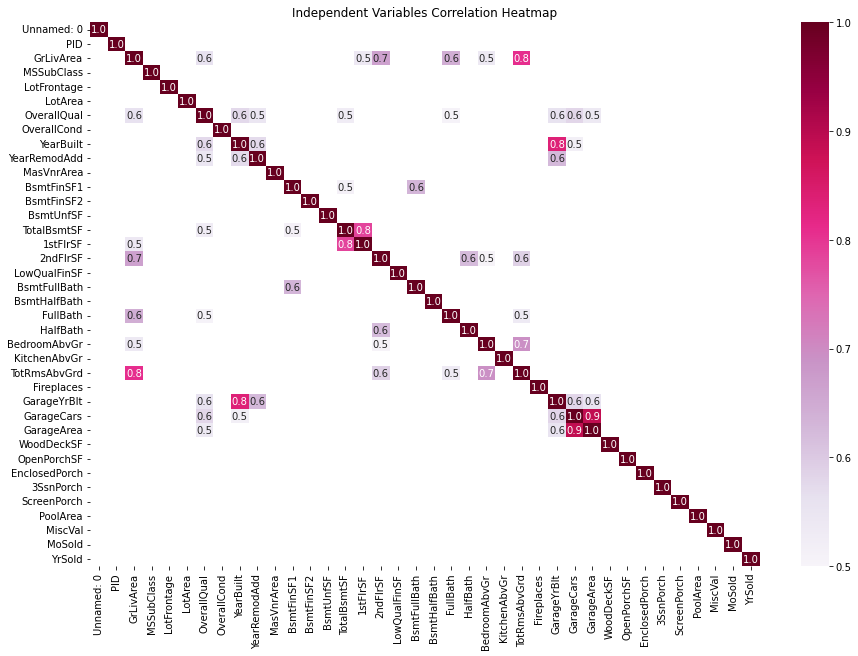

In [101]:
#create a heat map to see the multicollinearity between independent variables
#we see four pairs that stand out
x_no_price = price.loc[:, ~price.columns.isin(['SalePrice'])]
corr_mat = x_no_price.iloc[:, :-1].corr()
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='PuRd',
            vmin=0.5,
            vmax=1)
title = plt.title('Independent Variables Correlation Heatmap')